## Lending Club Case Study - Exploratory Data Analysis


### Assignment Brief:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
    

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

## Data Reading and Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings("ignore")

### Reading Loan File using Read CSV

In [9]:
loan = pd.read_csv("loan.csv",encoding = "ISO-8859-1", low_memory=False)

In [8]:
loan.shape

(39717, 111)

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

Missing values per column expressed as % of total number of values

In [6]:
missing = round(100*(loan.isnull().sum()/loan.isnull().count()), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns in the data with 100% missing values. Lets remove all the columns with more than 50% missing values.

In [7]:
columns_missing = list(missing[missing >=50].index)

len(columns_missing)

57

Removing 57 columns with has 50% and more missing value

In [8]:
loan = loan.drop(columns_missing,axis=1)
loan.shape

(39717, 54)

Analysing Missing values again

In [9]:
missing = round(100*(loan.isnull().sum()/loan.isnull().count()), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Analysing Unique Values in the column

In [10]:
for column in loan.columns:
    if(len(loan[column].unique())<5):
        print("Unique Values in",column,"is" , len(loan[column].unique()),"Values",loan[column].unique())
    

Unique Values in term is 2 Values [' 36 months' ' 60 months']
Unique Values in verification_status is 3 Values ['Verified' 'Source Verified' 'Not Verified']
Unique Values in loan_status is 3 Values ['Fully Paid' 'Charged Off' 'Current']
Unique Values in pymnt_plan is 1 Values ['n']
Unique Values in initial_list_status is 1 Values ['f']
Unique Values in collections_12_mths_ex_med is 2 Values [ 0. nan]
Unique Values in policy_code is 1 Values [1]
Unique Values in application_type is 1 Values ['INDIVIDUAL']
Unique Values in acc_now_delinq is 1 Values [0]
Unique Values in chargeoff_within_12_mths is 2 Values [ 0. nan]
Unique Values in delinq_amnt is 1 Values [0]
Unique Values in pub_rec_bankruptcies is 4 Values [ 0.  1.  2. nan]
Unique Values in tax_liens is 2 Values [ 0. nan]


Further Droping columns that are not relevant in Data analysis

In [11]:
loan = loan.drop(['emp_title','desc','member_id','id','url','application_type','pymnt_plan','initial_list_status',
                  'collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths',
                  'delinq_amnt','tax_liens'],axis=1)

In [12]:
loan.shape

(39717, 40)

Dropping funded_amnt & funded_amnt_inv as values are almost equivalent to loan_amnt

In [13]:
loan=loan.drop(['funded_amnt', 'funded_amnt_inv'],axis=1)

In [14]:
loan.shape

(39717, 38)

Checking Missing value

In [15]:
missing = round(100*(loan.isnull().sum()/loan.isnull().count()), 2)
missing[missing != 0]

emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

Checking null values in pub_rec_bankruptcies, emp_length, title, revol_util & last_pymt_d

In [16]:
print("pub_rec_bankruptcies null values :",loan.pub_rec_bankruptcies.isnull().sum())
print("emp_length null values :",loan.emp_length.isnull().sum())
print("title null values :",loan.title.isnull().sum())
print("revol_util null values :",loan.revol_util.isnull().sum())
print("last_pymnt_d null values :",loan.last_pymnt_d.isnull().sum())

pub_rec_bankruptcies null values : 697
emp_length null values : 1075
title null values : 11
revol_util null values : 50
last_pymnt_d null values : 71


Removing all rows from pub_rec_bankruptcies, emp_length, title, revol_util & last_pymt_d where data is null

In [17]:
loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan = loan[~loan.emp_length.isnull()]
loan = loan[~loan.title.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]


Checking Missing values again

In [18]:
missing = round(100*(loan.isnull().sum()/loan.isnull().count()), 2)
missing

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [19]:
loan.shape

(37826, 38)

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
These columns are:

    1. issue_d
    2. earliest_cr_line
    3. last_pymnt_d
    4. last_credit_pull_d

In [20]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             37826 non-null  object
 1   earliest_cr_line    37826 non-null  object
 2   last_pymnt_d        37826 non-null  object
 3   last_credit_pull_d  37825 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the Datatype of these columns to datetime

In [21]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [22]:
loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37826 non-null  datetime64[ns]
 1   earliest_cr_line    37826 non-null  datetime64[ns]
 2   last_pymnt_d        37826 non-null  datetime64[ns]
 3   last_credit_pull_d  37825 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping any duplicate values

In [23]:
loan.drop_duplicates(inplace=True)
loan.shape

(37826, 38)

There are few columns expressing % like int_rate and revol_util.
Further these columns has dtype as 'object'. Let's convert these columns to float.

In [24]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [25]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    37826 non-null  float64
 1   revol_util  37826 non-null  float64
dtypes: float64(2)
memory usage: 886.5 KB


emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Converting the values into Usable format

In [26]:
loan.emp_length.value_counts()

10+ years    8749
< 1 year     4396
2 years      4293
3 years      4023
4 years      3375
5 years      3234
1 year       3132
6 years      2192
7 years      1746
8 years      1449
9 years      1237
Name: emp_length, dtype: int64

In [27]:
loan.emp_length=loan.emp_length.str.strip('years').str.strip('year').str.strip('< ').str.strip('+').astype('float')

In [28]:
loan.emp_length.value_counts()

10.0    8749
1.0     7528
2.0     4293
3.0     4023
4.0     3375
5.0     3234
6.0     2192
7.0     1746
8.0     1449
9.0     1237
Name: emp_length, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
removing the months string from within the column term.

In [29]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [30]:
loan.term.value_counts()

36    27492
60    10334
Name: term, dtype: int64

earliest_cr_line: The month the borrower's earliest reported credit line was opened. 

Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

In [31]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [32]:
loan['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2065, 2063,
       2066, 2064, 2062, 2056, 2046, 2050, 2054])

since the data should be less than 2011 we will convert all the years > 2011 to 1900's year

In [33]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

dropping **earliest_cr_line** column

In [34]:
loan=loan.drop(['earliest_cr_line'],axis=1)

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [35]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

dropping **issue_d** column

In [36]:
loan=loan.drop(['issue_d'],axis=1)

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37826 entries, 0 to 39680
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                37826 non-null  int64         
 1   term                     37826 non-null  object        
 2   int_rate                 37826 non-null  float64       
 3   installment              37826 non-null  float64       
 4   grade                    37826 non-null  object        
 5   sub_grade                37826 non-null  object        
 6   emp_length               37826 non-null  float64       
 7   home_ownership           37826 non-null  object        
 8   annual_inc               37826 non-null  float64       
 9   verification_status      37826 non-null  object        
 10  loan_status              37826 non-null  object        
 11  purpose                  37826 non-null  object        
 12  title                    37826 n

In [38]:
loan.loan_status.value_counts()

Fully Paid     31525
Charged Off     5203
Current         1098
Name: loan_status, dtype: int64

Since Loans that are in **Current** can not be considered for Defaulter or Non Defaulter, We will ignore all the values where **loan_status** is Current

In [39]:
loan = loan[loan['loan_status']!="Current"]

Checking Unique Values in Again

In [40]:
for column in loan.columns:
    if(len(loan[column].unique())<5):
        print("Unique Values in",column,"is" , len(loan[column].unique()),"Values",loan[column].unique())

Unique Values in term is 2 Values ['36' '60']
Unique Values in home_ownership is 4 Values ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique Values in verification_status is 3 Values ['Verified' 'Source Verified' 'Not Verified']
Unique Values in loan_status is 2 Values ['Fully Paid' 'Charged Off']
Unique Values in out_prncp is 1 Values [0.]
Unique Values in out_prncp_inv is 1 Values [0.]
Unique Values in pub_rec_bankruptcies is 3 Values [0. 1. 2.]


Dropping columns out_prncp & out_prncp_inv

In [41]:
loan = loan.drop(['out_prncp','out_prncp_inv'],axis=1)

In [42]:
loan.shape

(36728, 38)

## Analysis

# Univariate and Segmented Univariate Analysis

### **column - loan_status**

In [43]:
plt.figure(figsize=(5,3))
loan.groupby('loan_status').loan_amnt.count()

loan_status
Charged Off     5203
Fully Paid     31525
Name: loan_amnt, dtype: int64

<Figure size 360x216 with 0 Axes>

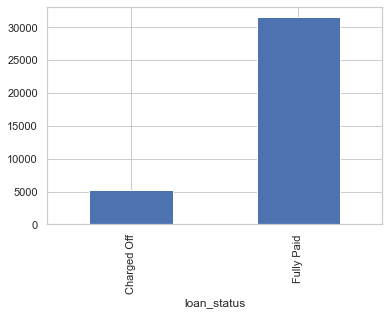

In [44]:
loan.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

### Observations 
Dataset has Approx 5000 Charged off data and around 31000 Fullay Paid data

### **column - total_pymt**

In [45]:
loan.total_pymnt.describe()

count    36728.000000
mean     12020.443938
std       8849.525609
min         33.730000
25%       5590.344605
50%       9833.520000
75%      16322.594433
max      58563.679930
Name: total_pymnt, dtype: float64

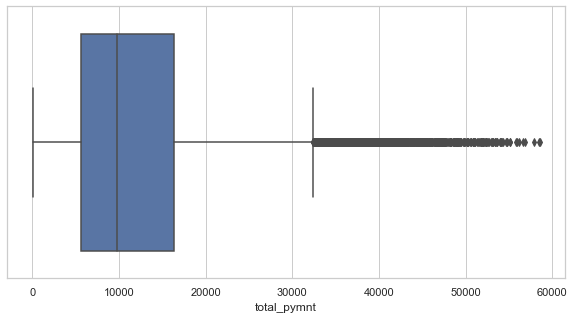

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(loan.total_pymnt)
plt.show()

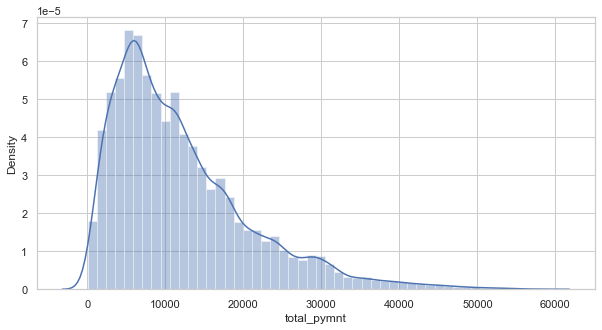

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(loan.total_pymnt)
plt.show()

### Observation
There is no such outlier in the **total_pymt** that will effect our analysis

### **column - annual_inc**

In [48]:
loan['annual_inc'].describe()

count    3.672800e+04
mean     6.947266e+04
std      6.406891e+04
min      4.000000e+03
25%      4.120000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

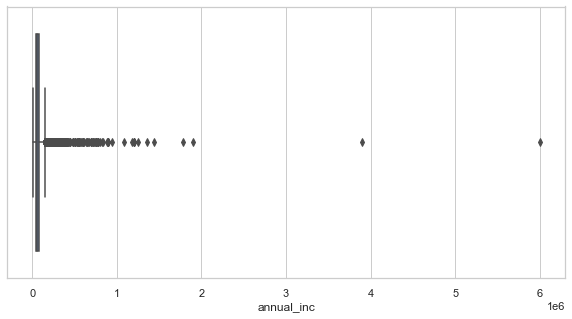

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(loan.annual_inc)
plt.show()

Based On above plot, Removing Outliers

In [50]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

In [51]:
loan['annual_inc'].describe()

count     36359.000000
mean      66032.378625
std       35111.863979
min        4000.000000
25%       41000.000000
50%       59200.000000
75%       82000.000000
max      234996.000000
Name: annual_inc, dtype: float64

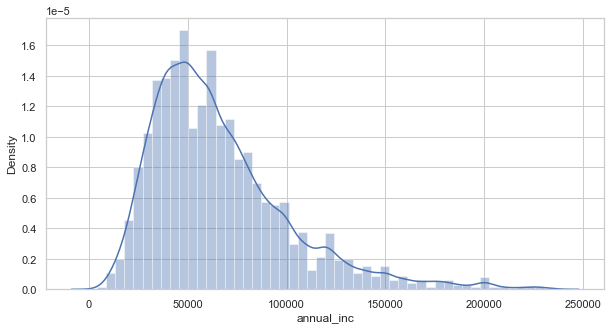

In [52]:
plt.figure(figsize=(10,5))
sns.distplot(loan.annual_inc)
plt.show()

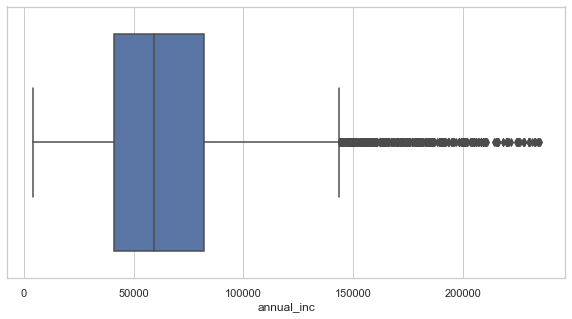

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(loan.annual_inc)
plt.show()

### Observations 
There were Outliers which exists in **annual_inc** column. We have removed those outliers.

## **column - int_rate**

In [54]:
loan['int_rate'].describe()

count    36359.000000
mean        11.965181
std          3.693389
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

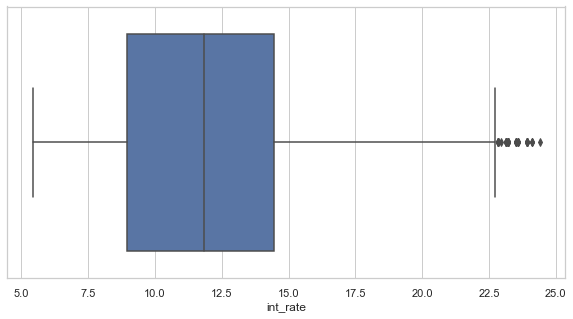

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(loan.int_rate)
plt.show()

### Observations 
No Outliers ar present in **int_rate**

## Correlation Matrix - Quantitative Variables :

In [56]:
loan_correlation = loan.corr()

In [57]:
loan_correlation

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
loan_amnt,1.000000,0.297228,0.930473,0.149105,0.413825,0.070040,-0.038049,0.007405,0.171196,-0.045511,...,0.727978,0.049267,0.144510,0.076772,0.473923,-0.029425,-0.014701,-0.189147,0.053955,0.113886
int_rate,0.297228,1.000000,0.274067,-0.002196,0.064580,0.110700,0.157016,0.134879,0.005018,0.100049,...,0.521640,0.100036,0.130501,0.071232,0.171361,0.084028,-0.010983,0.118687,0.023853,0.025167
installment,0.930473,0.274067,1.000000,0.121596,0.410871,0.060426,-0.026589,0.005010,0.166471,-0.040883,...,0.640962,0.059270,0.121948,0.076665,0.412567,-0.026694,-0.010741,-0.166326,0.033111,0.059200
emp_length,0.149105,-0.002196,0.121596,1.000000,0.173023,0.050013,0.013521,0.010535,0.096958,0.065365,...,0.116005,-0.014201,0.027177,0.007087,0.084105,0.063671,-0.041736,-0.285415,0.022256,0.108858
annual_inc,0.413825,0.064580,0.410871,0.173023,1.000000,-0.113484,0.025544,0.039503,0.258786,-0.014991,...,0.280332,0.016844,0.039767,0.023022,0.223447,-0.011030,-0.016442,-0.300519,0.013038,0.038508
dti,0.070040,0.110700,0.060426,0.050013,-0.113484,1.000000,-0.033575,0.003056,0.294872,-0.006084,...,0.108357,-0.011227,0.024374,0.010795,0.013466,0.005564,0.009540,-0.046684,0.009078,0.080102
delinq_2yrs,-0.038049,0.157016,-0.026589,0.013521,0.025544,-0.033575,1.000000,0.006782,0.011754,0.011268,...,0.018423,0.029522,0.010922,0.011799,-0.015593,0.005660,0.000230,-0.065675,-0.011368,0.002757
inq_last_6mths,0.007405,0.134879,0.005010,0.010535,0.039503,0.003056,0.006782,1.000000,0.094054,0.024170,...,0.025370,0.031448,0.019072,0.012550,0.026545,0.014751,-0.009184,-0.010379,0.016856,-0.059107
open_acc,0.171196,0.005018,0.166471,0.096958,0.258786,0.294872,0.011754,0.094054,1.000000,0.004741,...,0.118586,-0.018535,0.017217,0.006785,0.078898,0.010827,0.003753,-0.227225,0.001683,0.015059
pub_rec,-0.045511,0.100049,-0.040883,0.065365,-0.014991,-0.006084,0.011268,0.024170,0.004741,1.000000,...,-0.000303,-0.005499,-0.005740,-0.006447,-0.032255,0.842784,-0.010670,-0.054327,-0.024141,-0.016157


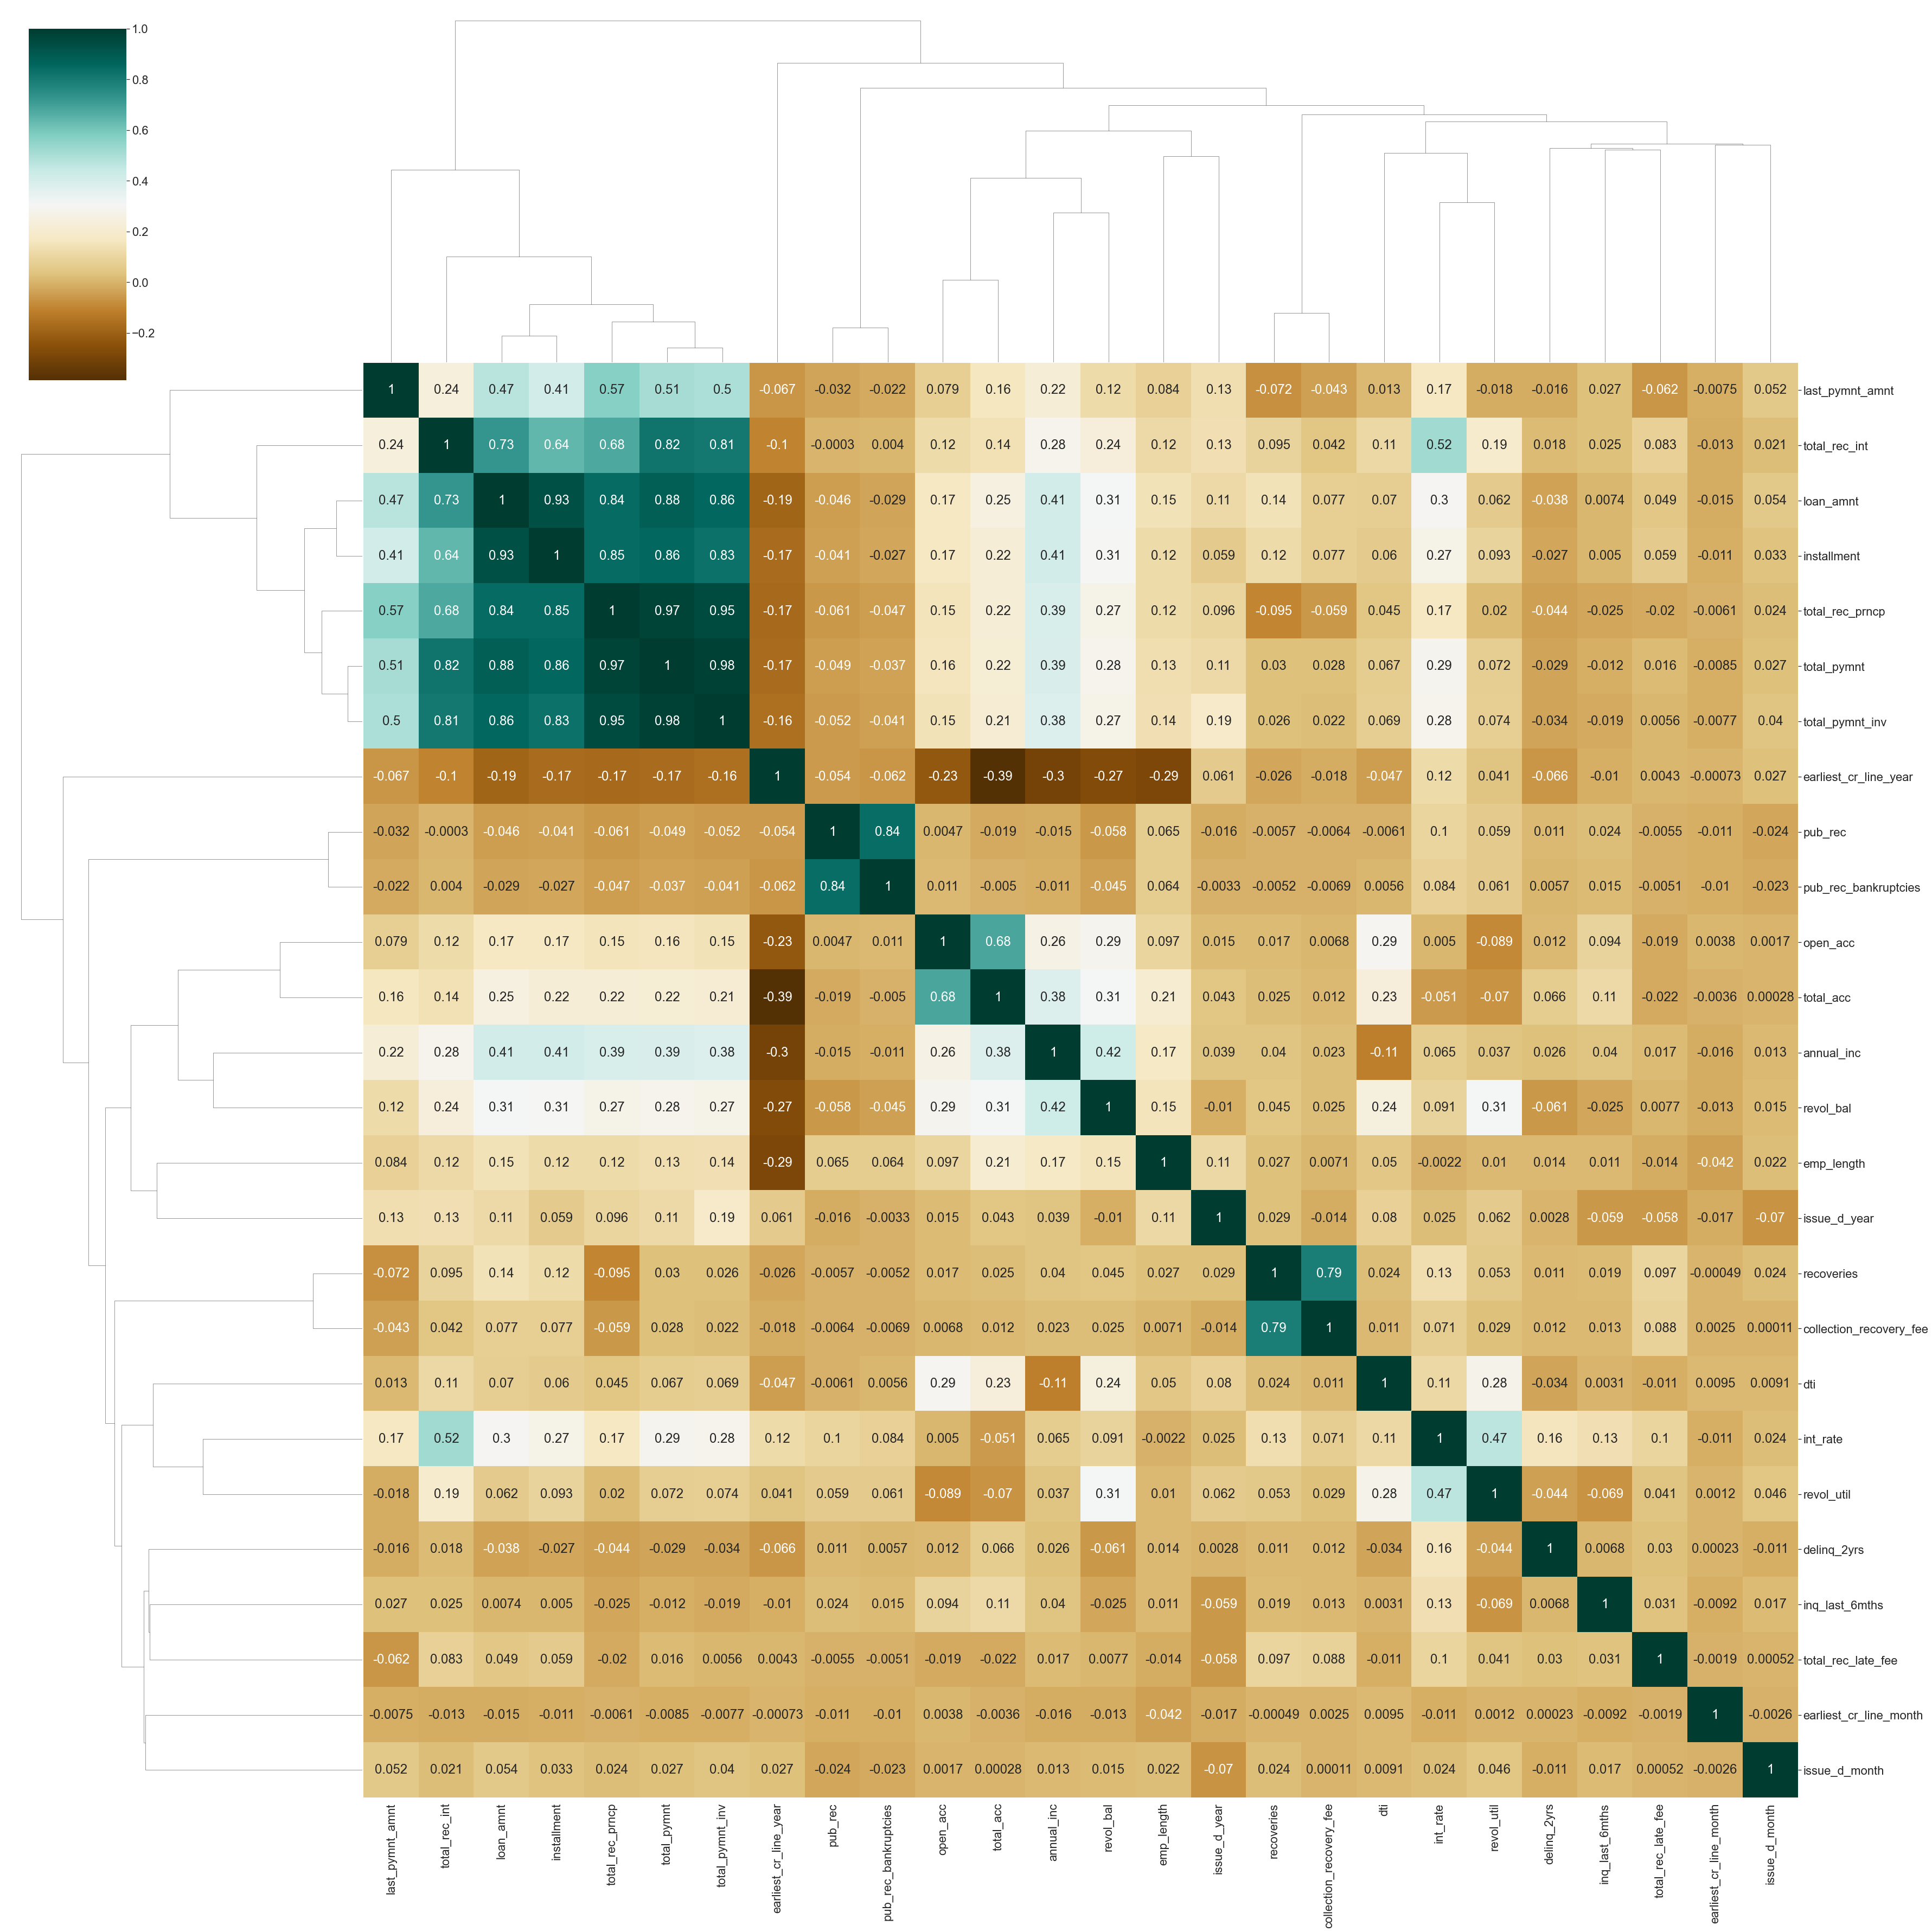

In [58]:
sns.set(font_scale=2)
sns.clustermap(loan_correlation,annot=True,figsize=(50, 50),cmap="BrBG")
plt.show()

### Observations 
- Annual income with DTI(Debt-to-income ratio) is negatively correalted.
- That means when annual income is low DTI is high & vice versa.

### **column - loan_amnt**

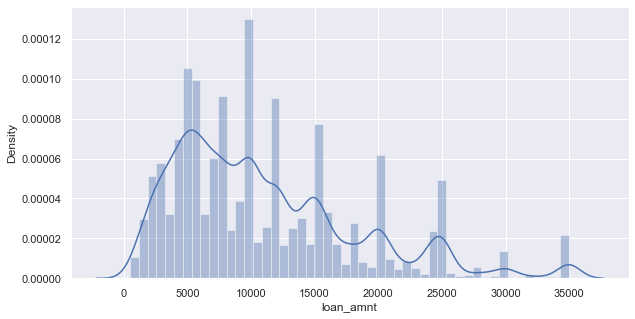

In [59]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
sns.distplot(loan.loan_amnt)
plt.show()

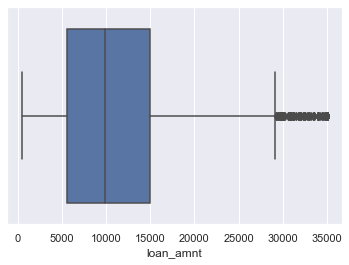

In [60]:
sns.boxplot(loan['loan_amnt'])
plt.show()

### Observations
We can observe a spike in Loan amount at every 5000 Interval.

That can be used for grouping further in our analysis

## Variable - addr_state

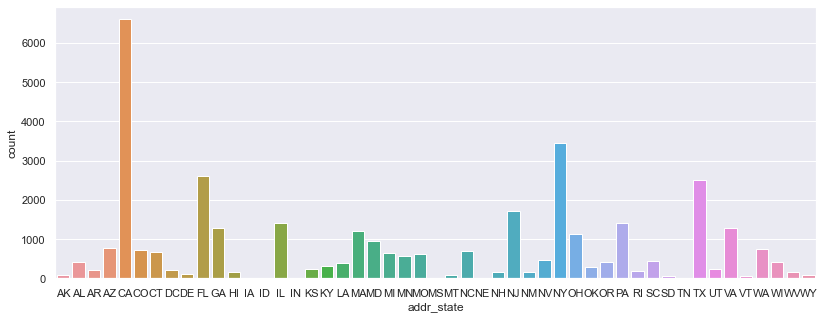

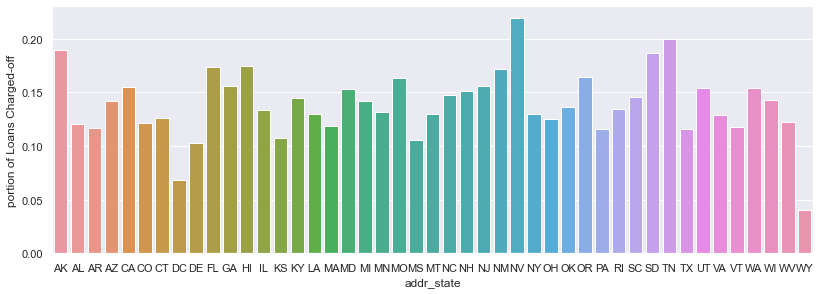

In [61]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

### Observations
NV has very huge population with Loan Charged-off based on **addr_state**

### Derive Columns For Analysis

In [62]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000,35000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k','30k+'])

In [63]:
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+'])

In [64]:
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 13, 16, 20], labels=['0-10', '10-13', '13-16', '16 +'])

In [65]:
# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [66]:
loan.shape

(36359, 42)

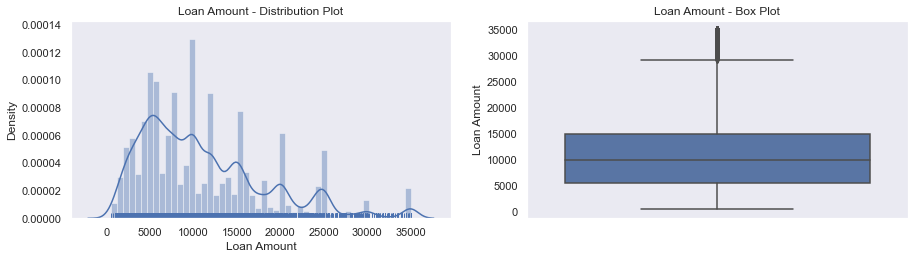

In [67]:
# Univariate Analysis on Loan Amount-Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot')
ax.set_ylabel('Loan Amount')
plt.show()

### Observations 
Above plots show that most of the Loan amounts are in range of 5000 - 15000

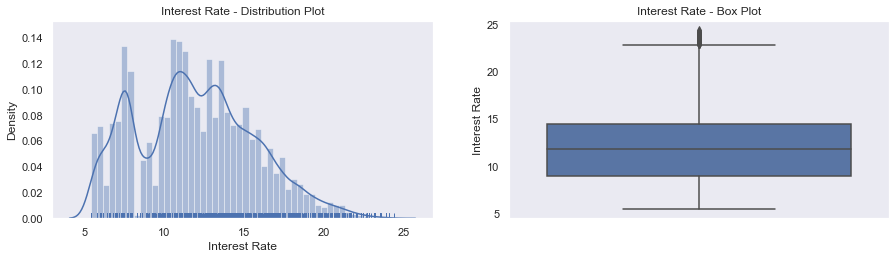

In [68]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot')
ax.set_xlabel('Interest Rate')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest Rate - Box Plot')
ax.set_ylabel('Interest Rate')
plt.show()

### Observations
Above plots show that most of the Interest Rates on loans are in range of 10% - 15%

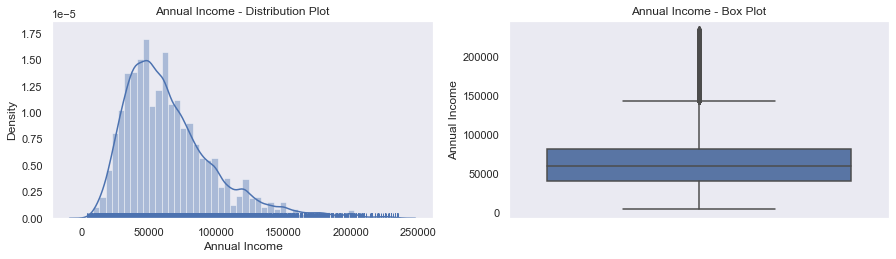

In [69]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot')
ax.set_xlabel('Annual Income')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot')
ax.set_ylabel('Annual Income')
plt.show()

### Observations
Above plots show that most of the borrower's Annual incomes are in range of 40000- 80000

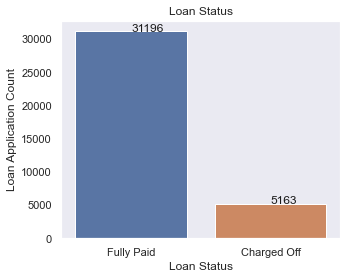

In [70]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(5,4))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Application Count')            
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

### Observations
Above plot shows that close to 14% loans were charged off out of total loan issued.

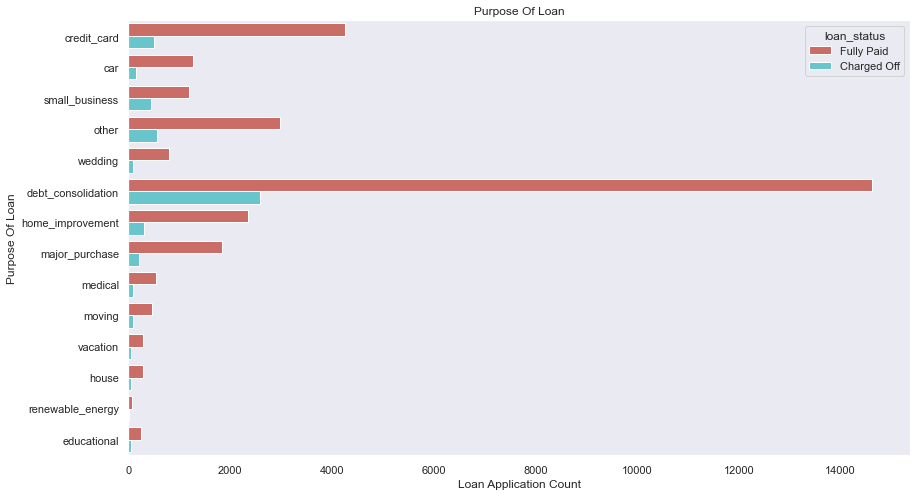

In [71]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='hls')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Purpose Of Loan')
ax.set_xlabel('Loan Application Count')      
plt.show()

### Observations
Above plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
Number of charged off count also high too for these loans.

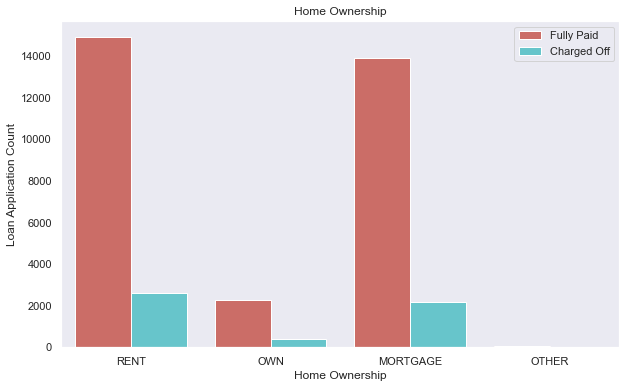

In [72]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='hls')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')      
plt.show()

### Observations
Below plot shows that most of them living in rented home or mortgazed their home.
Applicant numbers are high from these categories so charged off is high too.

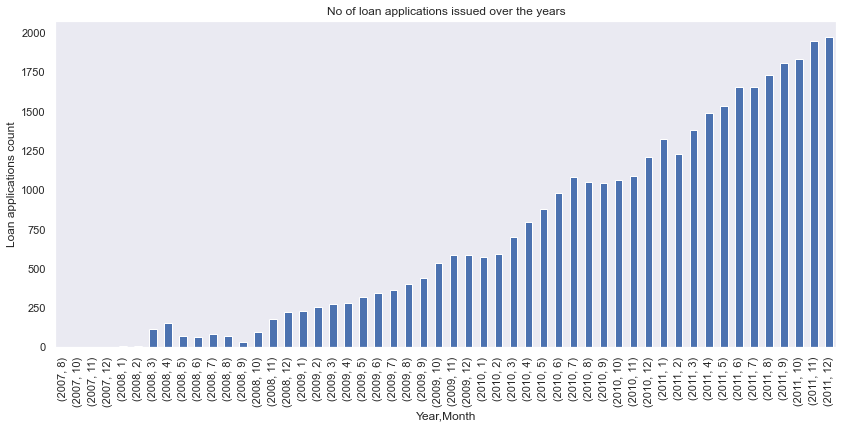

In [73]:
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6))
loan.groupby(['issue_d_year','issue_d_month']).loan_status.count().plot(kind='bar')
plt.ylabel('Loan applications count')
plt.xlabel('Year,Month')      
plt.title("No of loan applications issued over the years")
plt.show()

### Observation
Observation is that count of loan application is increasing every passing year.
so increase in number of loan applications are adding more to number of charged off applications.
number of loans issued in 2008( May-October) got dipped, may be due to Recession.

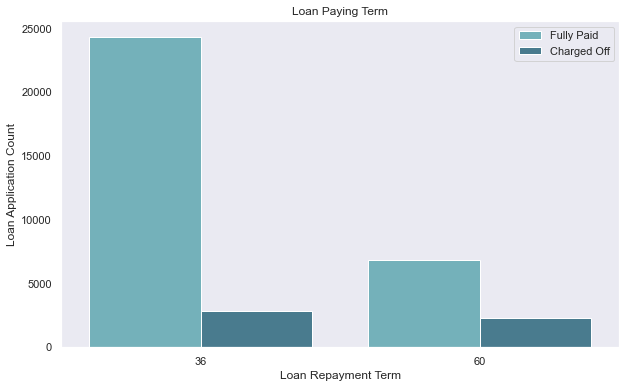

In [74]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Ter
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### Observations
Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
charged off as compared to applicants who had taken loan for 36 months.

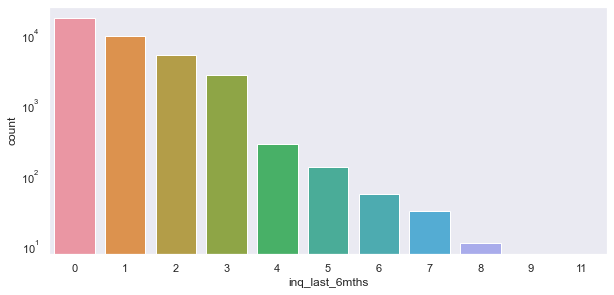

In [75]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan['inq_last_6mths'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

### Bivariate Analysis

In [76]:
# Bivariate Analysis on annual income against Chargedoff_%

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_%'] = round(inc_range_vs_loan['Charged Off']*100 / inc_range_vs_loan['Total'],2)
inc_range_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_%
0,0-20k,173,774,947,18.27
1,20k-40k,1369,6539,7908,17.31
2,40k-60k,1630,9167,10797,15.10
3,60k-80k,957,6400,7357,13.01
4,80k+,1034,8316,9350,11.06


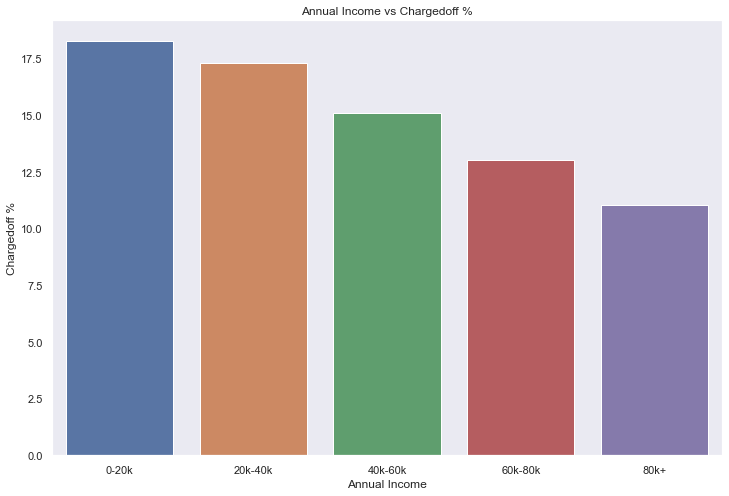

In [77]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff %')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_%', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff %')
ax1.set_xlabel('Annual Income')
plt.show()

### Observations:
- Income range 80k+  has least chances of charged off.
- Income range 0-20k has high chances of charged off.
- Notice that with increase in annual income charged off % got decreased. 

In [78]:
# Bivariate Analysis on purpose of Loan against Chargedoff_%

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_%'] = round(purpose_vs_loan['Charged Off']*100 / purpose_vs_loan['Total'],2)
purpose_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_%
11,small_business,435,1186,1621,26.84
10,renewable_energy,17,74,91,18.68
5,house,55,282,337,16.32
9,other,567,2988,3555,15.95
3,educational,46,244,290,15.86
7,medical,99,539,638,15.52
2,debt_consolidation,2580,14628,17208,14.99
8,moving,80,455,535,14.95
12,vacation,50,291,341,14.66
4,home_improvement,308,2347,2655,11.60


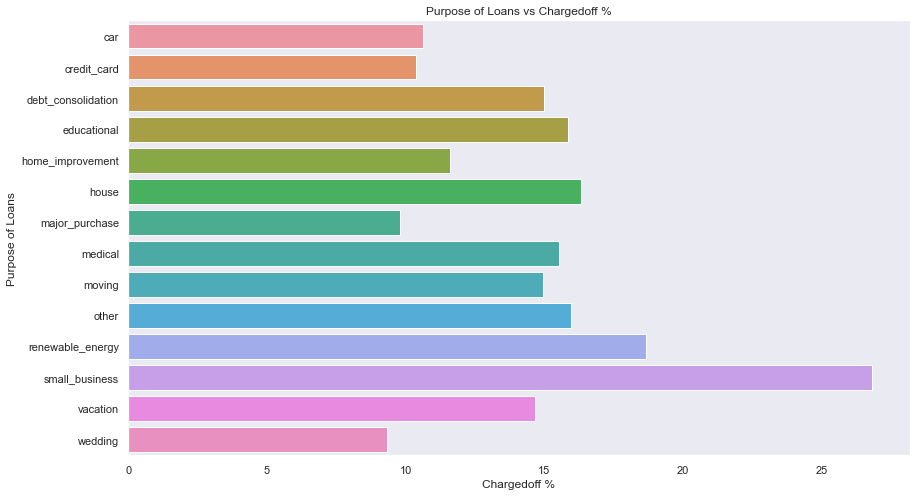

In [79]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff %')
ax1=sns.barplot(y='purpose', x='Chargedoff_%', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans')
ax1.set_xlabel('Chargedoff %')
plt.show()

### Observations:
- small Business applicants have high chances of getting charged off.
- renewable_energy where charged off % is better as compare to other categories.

In [80]:
# Bivariate Analysis on grade against Chargedoff_%

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_%'] = round(grade_vs_loan['Charged Off']*100 / grade_vs_loan['Total'],2)
grade_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_%
6,G,94,188,282,33.33
5,F,297,619,916,32.42
4,E,667,1848,2515,26.52
3,D,1030,3750,4780,21.55
2,C,1224,6150,7374,16.60
1,B,1306,9741,11047,11.82
0,A,545,8900,9445,5.77


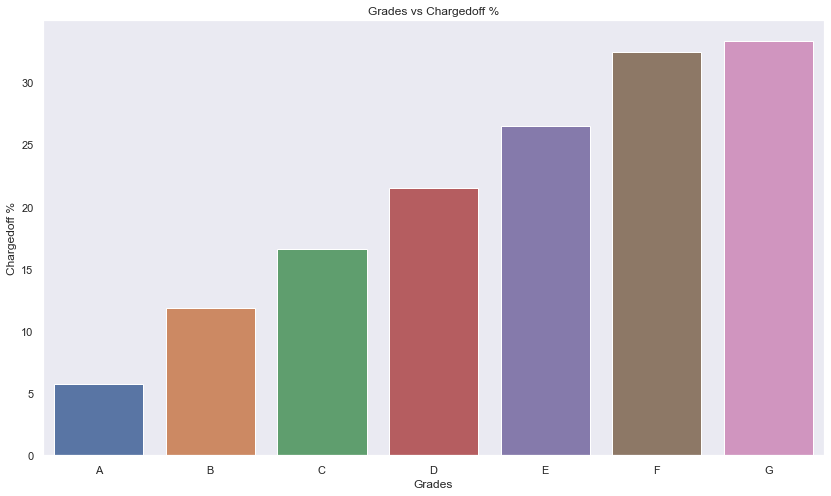

In [81]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Grades vs Chargedoff %')
ax1=sns.barplot(x='grade', y='Chargedoff_%', data=grade_vs_loan)
ax1.set_xlabel('Grades')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- Grade "A" has very less chances of charged off.
- Grade "F" and "G" have very high chances of charged off.
- Chances of charged off % is increasing with grade moving from "A" towards "G"

In [82]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_%

subgrade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_%'] = round(subgrade_vs_loan['Charged Off']*100 / subgrade_vs_loan['Total'],2)
subgrade_vs_loan.sort_values('Chargedoff_%', ascending=False)


loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_%
29,F5,51,52,103,49.51
32,G3,19,25,44,43.18
34,G5,10,17,27,37.04
28,F4,51,89,140,36.43
31,G2,26,47,73,35.62
30,G1,27,60,87,31.03
23,E4,121,284,405,29.88
26,F2,64,155,219,29.22
25,F1,84,207,291,28.87
27,F3,47,116,163,28.83


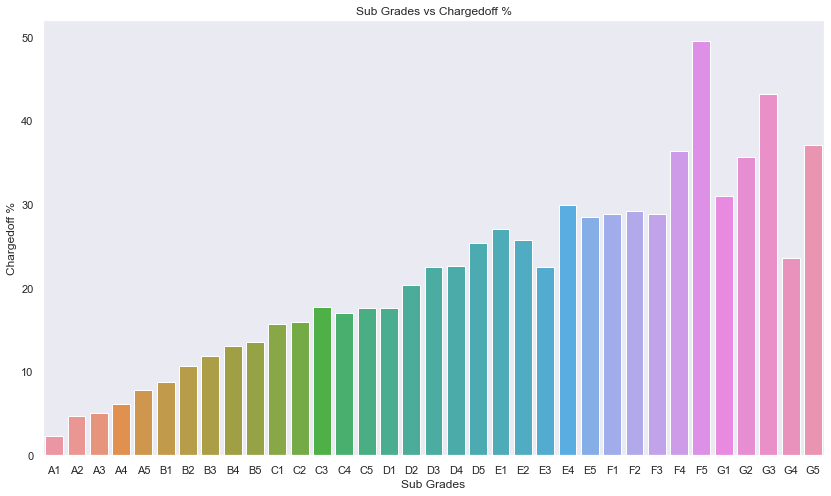

In [83]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Sub Grades vs Chargedoff %')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_%', data=subgrade_vs_loan)
ax1.set_xlabel('Sub Grades')
ax1.set_ylabel('Chargedoff %')
plt.show()



### Observations:
- sub Grades of "A" has very less chances of charged off.
- sub Grades of "F" and "G" have very high chances of charged off.
- proportion of charged off % is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [84]:
# Bivariate Analysis on interest rate against Chargedoff_%

interest_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_%'] = round(interest_vs_loan['Charged Off']*100 / interest_vs_loan['Total'],2)
interest_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_%
3,16 +,1191,3236,4427,26.90
2,13-16,1532,7226,8758,17.49
1,10-13,1433,9558,10991,13.04
0,0-10,726,10729,11455,6.34


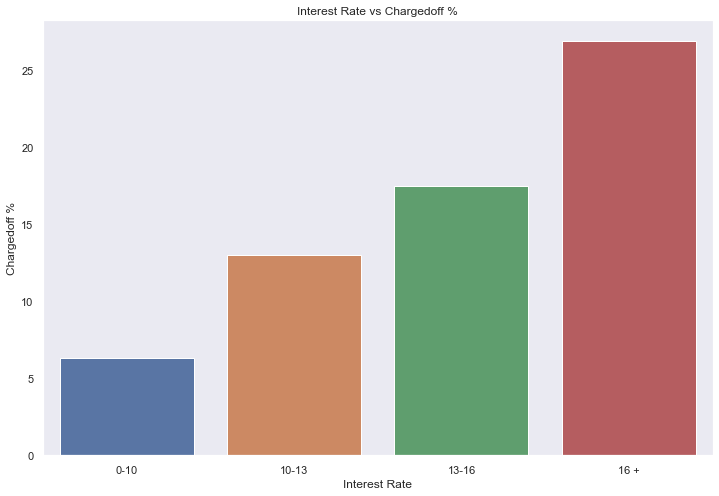

In [85]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff %')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_%', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
- interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
- Charged off % is increasing with higher intrest rates.

In [86]:
# Bivariate Analysis on employment length against Chargedoff_%

emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_%'] = round(emplen_vs_loan['Charged Off']*100 / emplen_vs_loan['Total'],2)
emplen_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_%
9,10.0,1279,6949,8228,15.54
6,7.0,256,1414,1670,15.33
4,5.0,442,2678,3120,14.17
7,8.0,196,1193,1389,14.11
0,1.0,1026,6305,7331,14.00
5,6.0,296,1818,2114,14.00
2,3.0,538,3367,3905,13.78
3,4.0,435,2821,3256,13.36
1,2.0,543,3608,4151,13.08
8,9.0,152,1043,1195,12.72


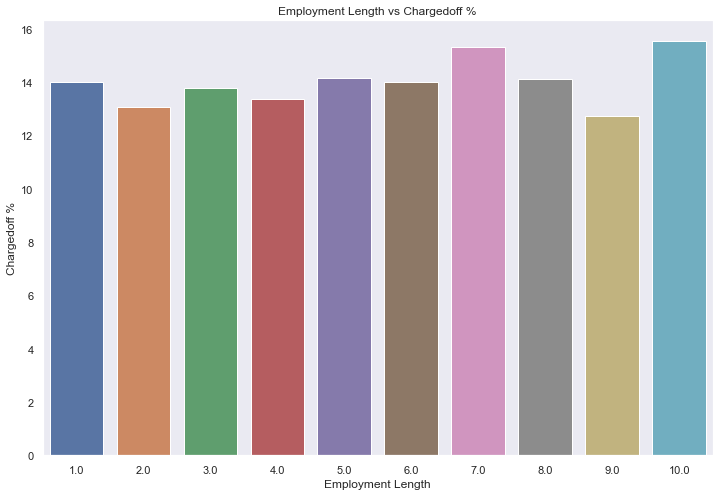

In [87]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff %')
ax1=sns.barplot(x='emp_length', y='Chargedoff_%', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
- It makes sense as with less or no experience they don't have source of income to repay loan.
- Rest of the applicants have more or less same chances of getting charged off.

In [88]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] +  verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_%'] = round(verfy_vs_loan['Charged Off']*100 / verfy_vs_loan['Total'],2)
verfy_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_%
2,Verified,1912,9658,11570,16.53
1,Source Verified,1369,7980,9349,14.64
0,Not Verified,1882,13558,15440,12.19


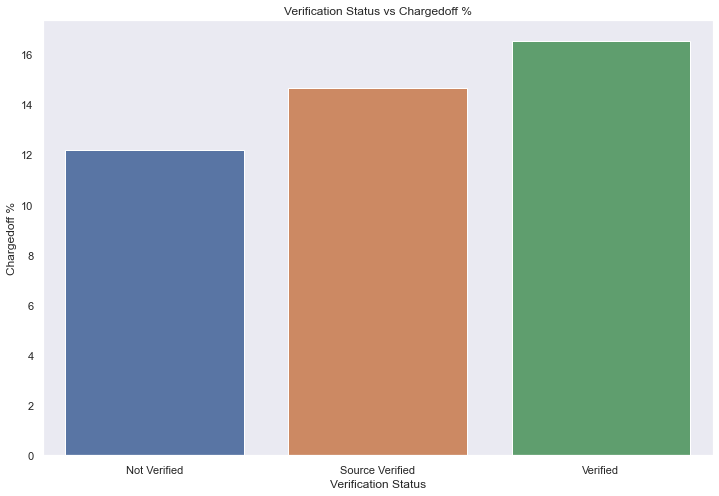

In [89]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff %')
ax1=sns.barplot(x='verification_status', y='Chargedoff_%', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- There is not much difference in charged off proportion.
- This variable doesn't provide any insights for charged off.

In [90]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_%'] = round(bankruptcies_vs_loan['Charged Off']*100 / bankruptcies_vs_loan['Total'],2)
bankruptcies_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_%
2,2.0,2,3,5,40.00
1,1.0,328,1191,1519,21.59
0,0.0,4833,30002,34835,13.87


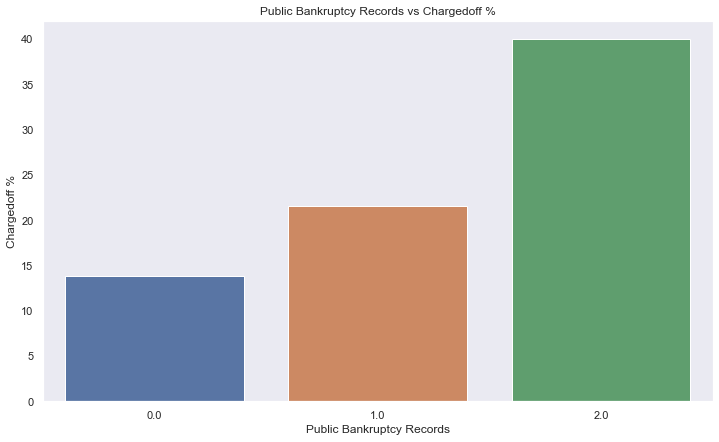

In [91]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Public Bankruptcy Records vs Chargedoff %')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_%', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
- pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
- This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [92]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_%'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_%', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_%
2,2,10.0,34.0,44.0,0.227273
1,1,408.0,1452.0,1860.0,0.219355
0,0,4745.0,29701.0,34446.0,0.137752
3,3,0.0,7.0,7.0,0.000000
4,4,0.0,2.0,2.0,0.000000


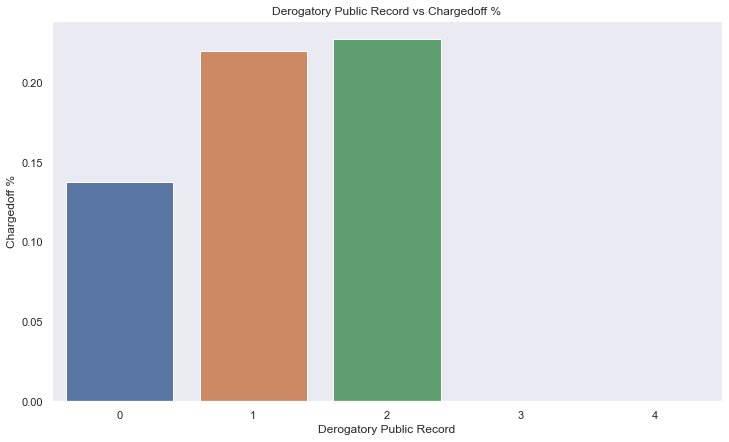

In [93]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.set_title('Derogatory Public Record vs Chargedoff %')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_%', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record')
ax1.set_ylabel('Chargedoff %')
plt.show()

### Observations:
- A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
- your ability to qualify for credit or other services. Public records and collections are derogatory items
- because they reflect financial obligations that were not paid as agreed.
- Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
- pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

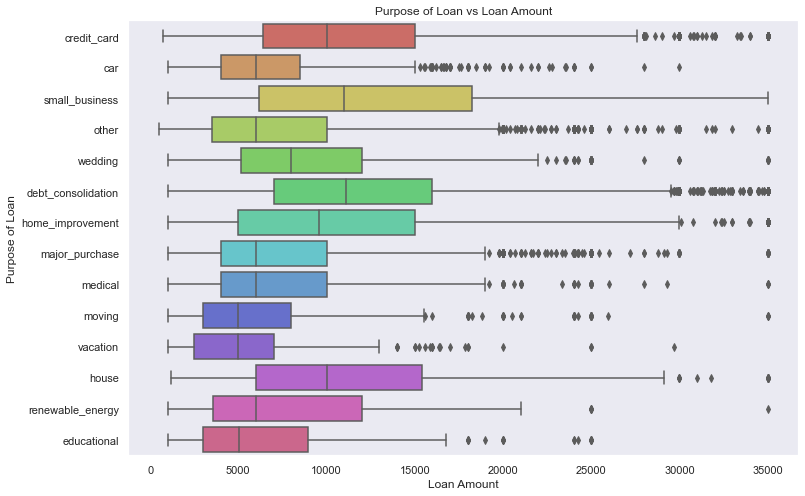

In [94]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='hls')
ax.set_title('Purpose of Loan vs Loan Amount')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations:
- Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
- Debt consolidation is second and Credit card comes 3rd.

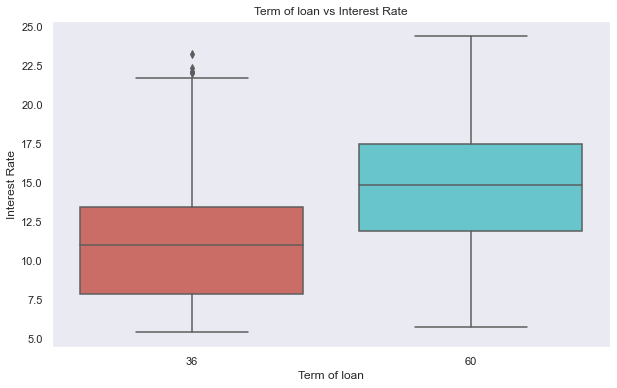

In [95]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='hls')
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()

### Observations:
- It is clear that avearge intrest rate is higher for 60 months loan term.
- Most of the loans issued for longer term had higher interest rates for repayement.

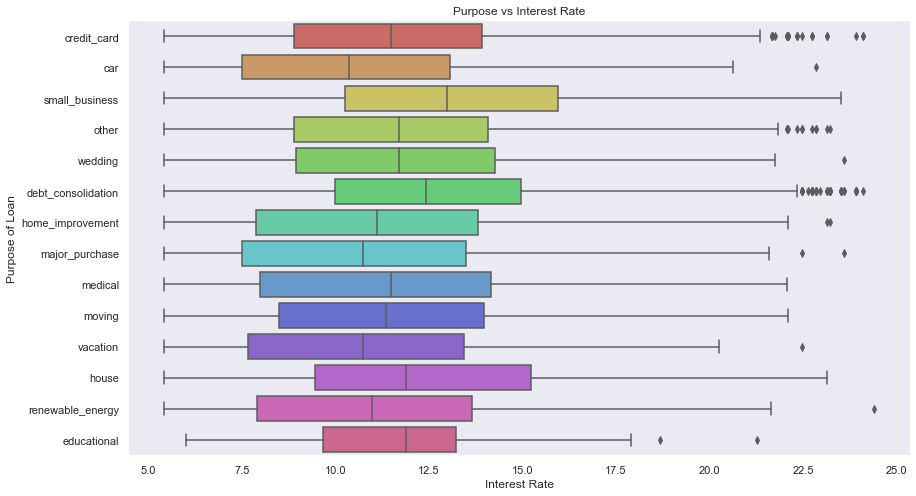

In [96]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='hls')
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

### Observations:
- It is clear that avearge intrest rate is highest for small business purpose.
- Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
- Debt consolidation is 2nd where borrowers had to pay more interest rate.

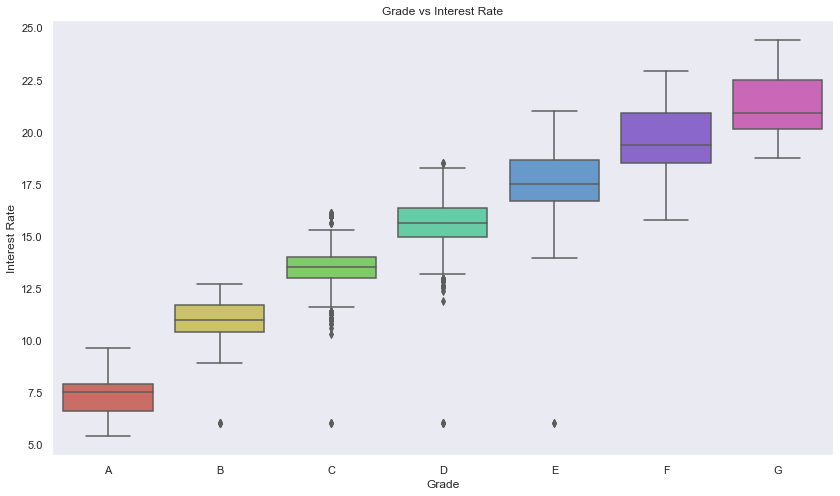

In [97]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='grade', data =loan,palette='hls',order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Grade')
plt.show()

### Observations:
- A-grade is a top letter grade for a lender to assign to a borrower.
- The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
- It is clear that intrest rate is increasing with grades moving from A to F.

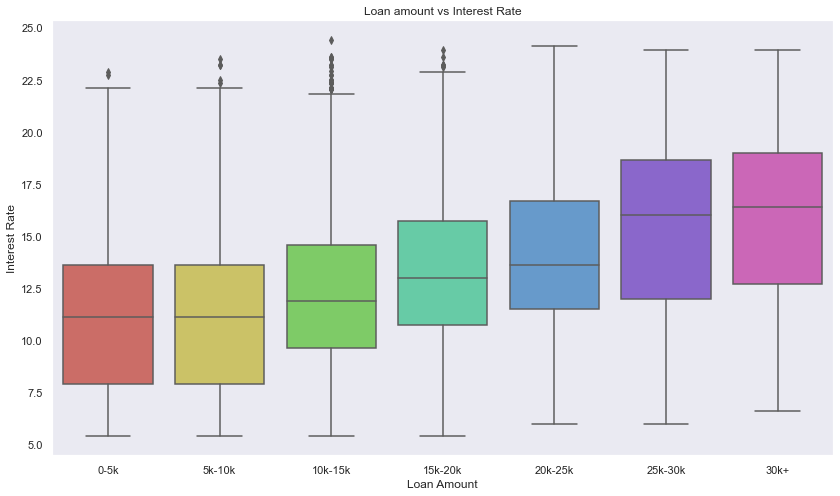

In [98]:
# Bivariate Analysis - Loan Amount vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan,palette='hls')
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations:
- It is clear that intrest rate is increasing with loan amount increase.
- probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.

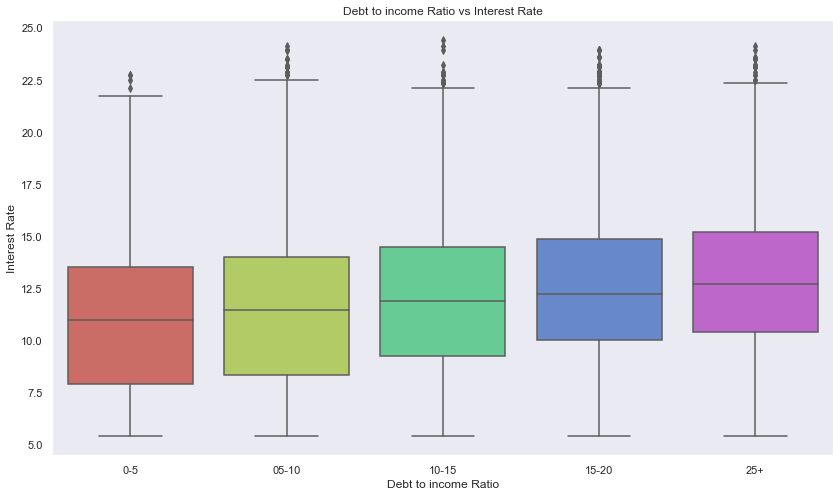

In [99]:
# Bivariate Analysis - dti vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_cats', data =loan,palette='hls')
ax.set_title('Debt to income Ratio vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Debt to income Ratio')
plt.show()

### Observations:
- If your DTI is low enough you may get a lower interest rate.
- Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

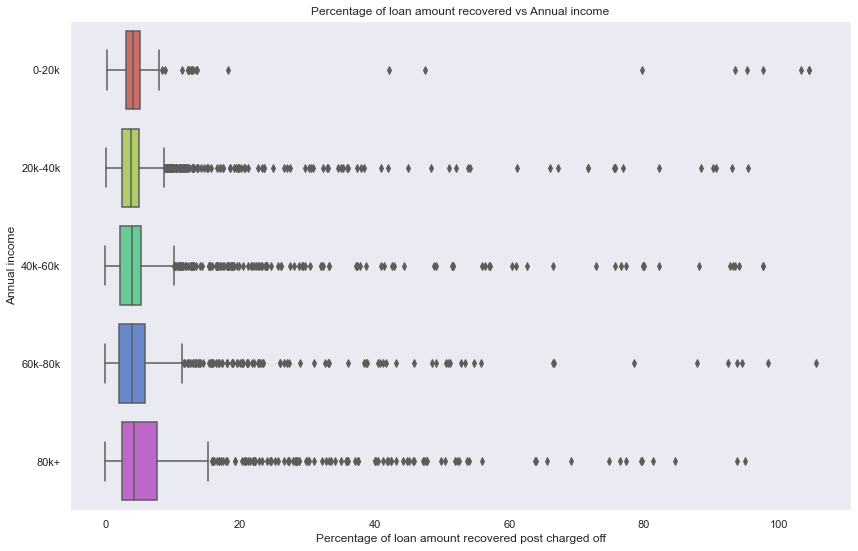

In [100]:
# Bivariate Analysis - Recoveries vs Annual income
# Box Plot
loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9))
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='hls')
ax.set_title('Percentage of loan amount recovered vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Percentage of loan amount recovered post charged off')
plt.show()

### Observations:
- Higher percentage of loan amount is recovered when annual income is high.
- Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

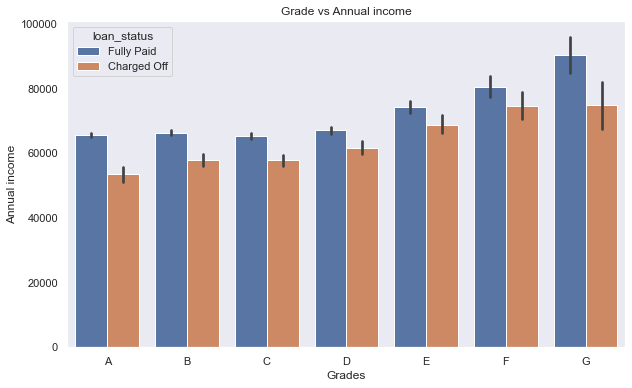

In [101]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.show()

### Observations:
- From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones who 'paid fully' for each and every grade (i.e. at same interest range)

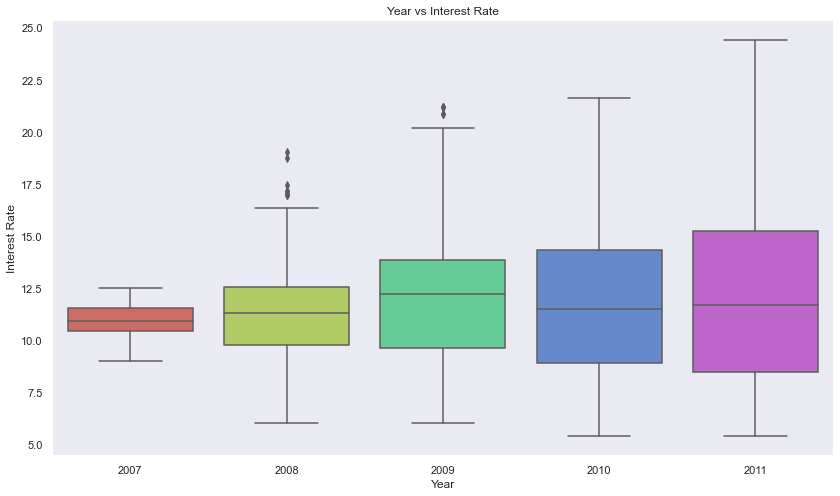

In [102]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='issue_d_year', data =loan,palette='hls')
ax.set_title('Year vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year')
plt.show()

### Observations:
- Plot shows intrest rate is increasing slowly with increase in year.

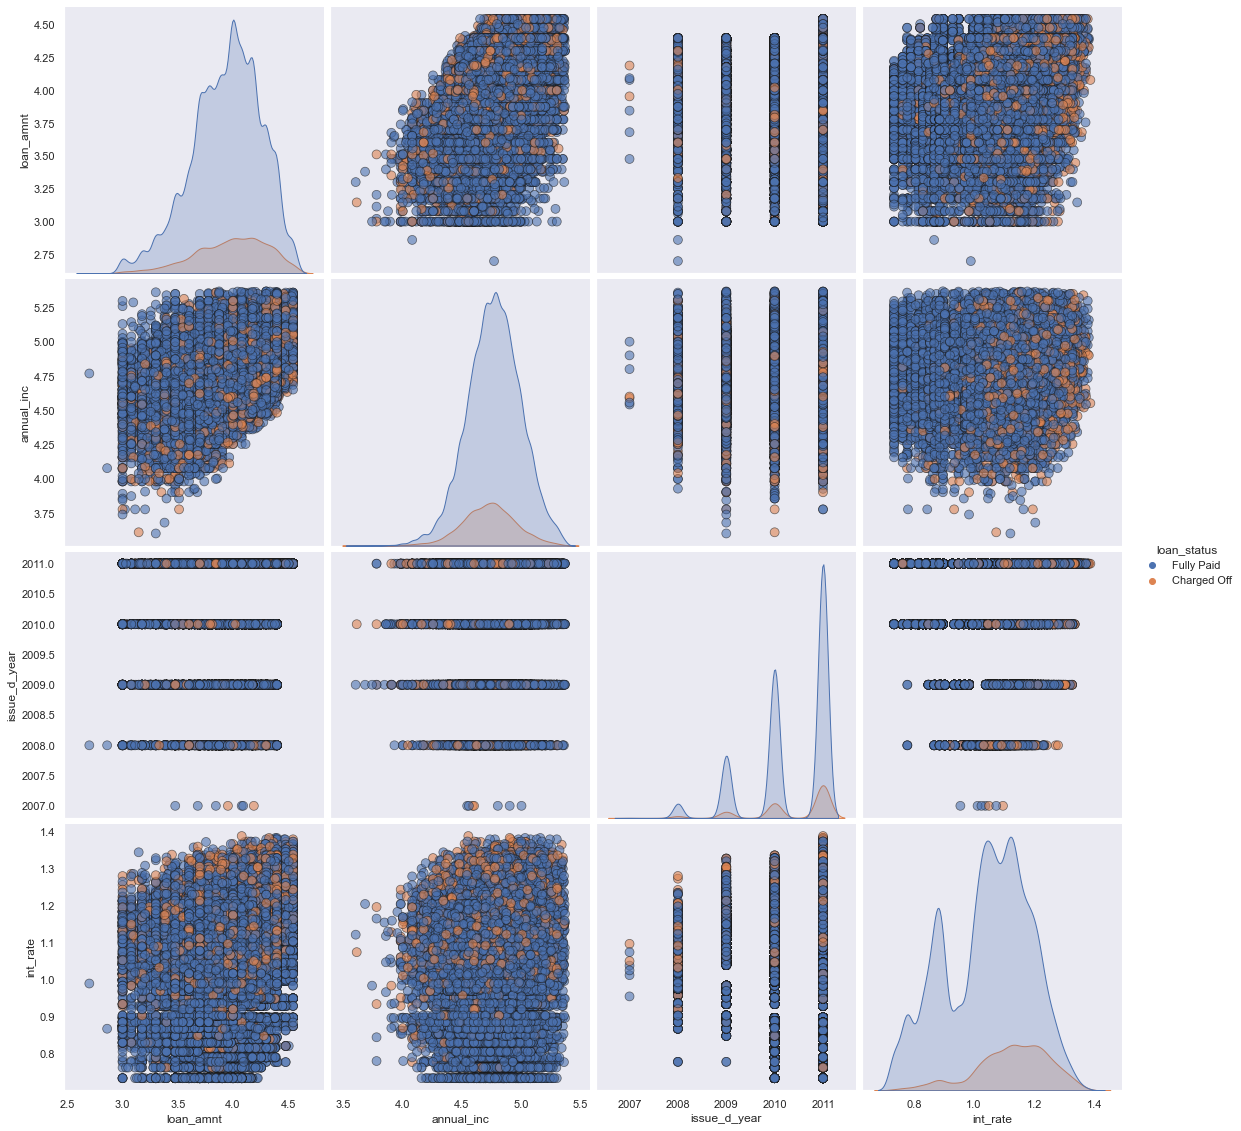

In [103]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset separately.

loan_pair = loan[['loan_amnt', 'annual_inc', 'issue_d_year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

### Observation:
- Higher the intrest rate higher charged off ratio
- Higher the annual income higher the loan amount slightly.
- increase in number of charged off with increase in year.
- intrest rate is increasing with loan amount increase